In [2]:
import pandas as pd
import tools

# Temporal Analyze to the Basics Experimentations

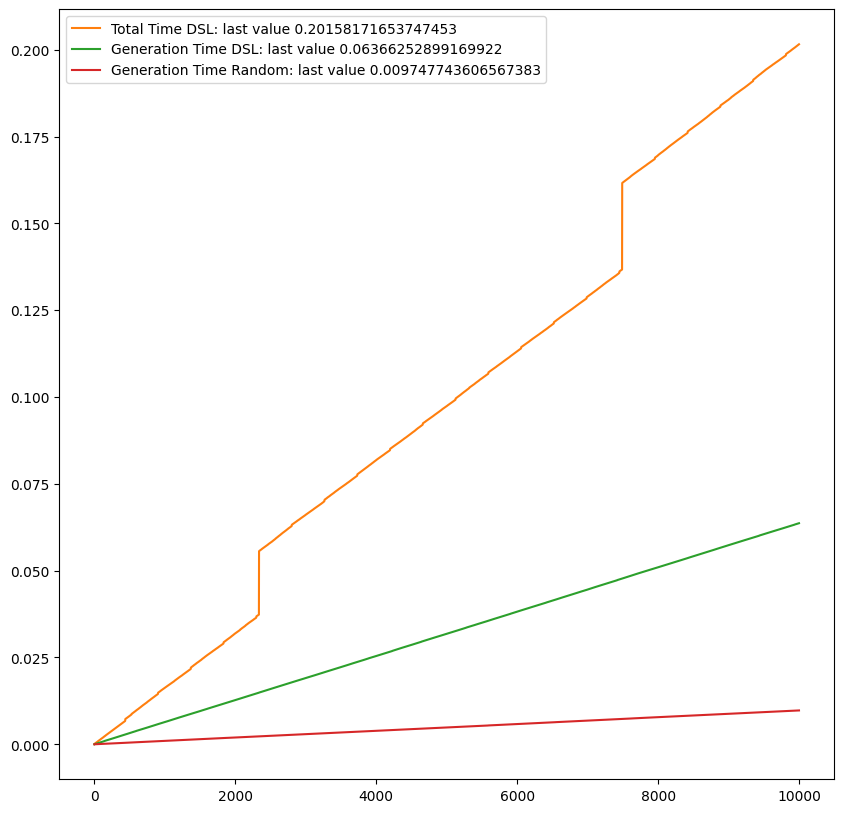

In [2]:
df = pd.read_csv('csv/int_times.csv')
X = df['index']
Y1 = tools.computing_time(df["time_dsl"])
Y2 = tools.computing_time(df["time_generation"])
Y3 = tools.computing_time(df["time_random"])

plt = tools.Plotting()
plt.append(X, Y1, f'Total Time DSL: last value {Y1[-1]}')
plt.append(X, Y2, f'Generation Time DSL: last value {Y2[-1]}')
plt.append(X, Y3, f'Generation Time Random: last value {Y3[-1]}')

plt.plot()

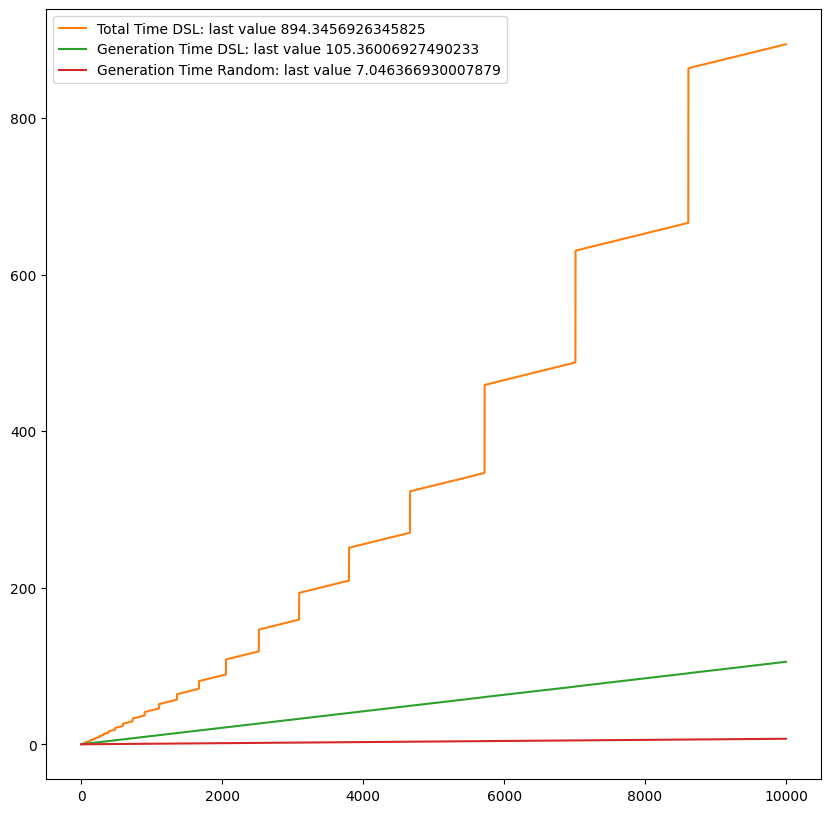

In [3]:
df = pd.read_csv('csv/list_times.csv')
X = df['index']
Y1 = tools.computing_time(df["time_dsl"])
Y2 = tools.computing_time(df["time_generation"])
Y3 = tools.computing_time(df["time_random"])

plt = tools.Plotting()
plt.append(X, Y1, f'Total Time DSL: last value {Y1[-1]}')
plt.append(X, Y2, f'Generation Time DSL: last value {Y2[-1]}')
plt.append(X, Y3, f'Generation Time Random: last value {Y3[-1]}')

plt.plot()

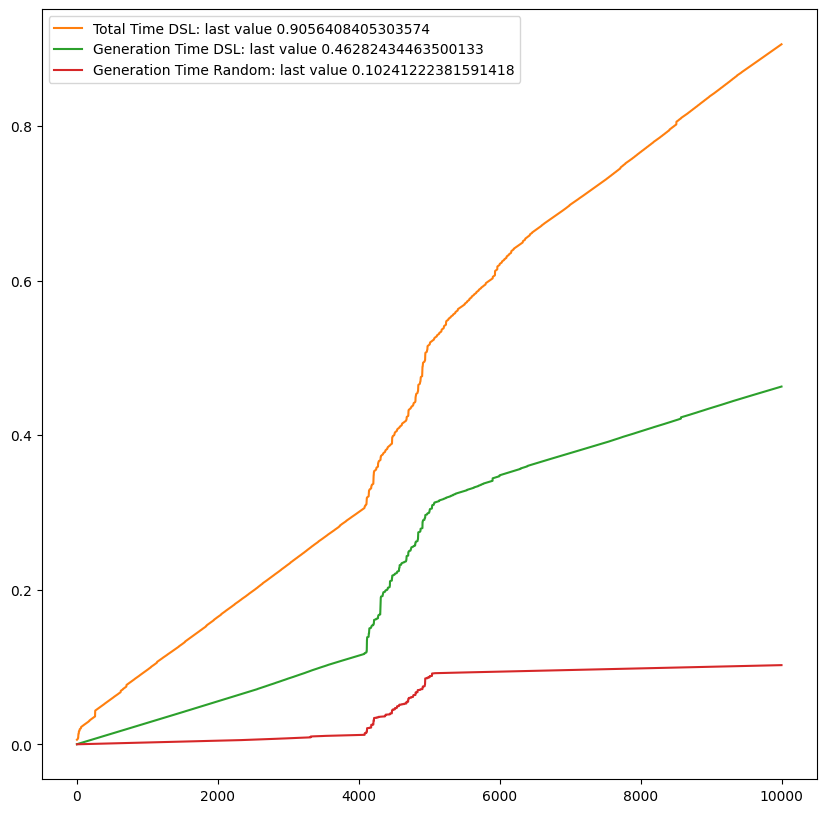

In [4]:
df = pd.read_csv('csv/class_times.csv')
X = df['index']
Y1 = tools.computing_time(df["time_dsl"])
Y2 = tools.computing_time(df["time_generation"])
Y3 = tools.computing_time(df["time_random"])

plt = tools.Plotting()
plt.append(X, Y1, f'Total Time DSL: last value {Y1[-1]}')
plt.append(X, Y2, f'Generation Time DSL: last value {Y2[-1]}')
plt.append(X, Y3, f'Generation Time Random: last value {Y3[-1]}')

plt.plot()


# Temporal and Attempting Analyze for Set Generation

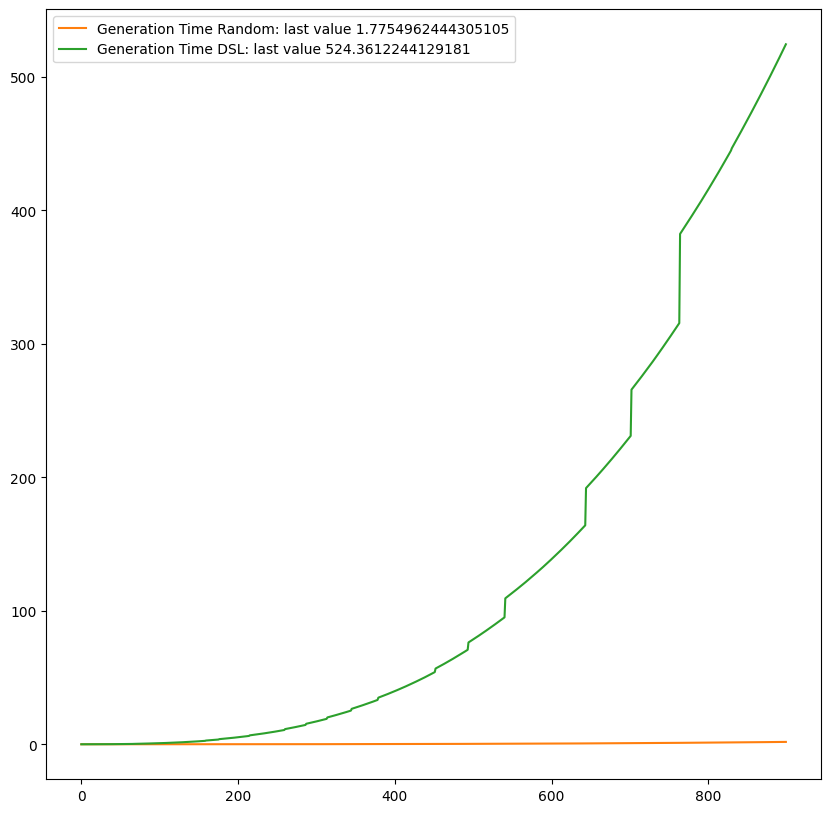

In [5]:
df = pd.read_csv('csv/set_randint_data.csv')
X = df['iter_num']
Y1 = tools.computing_time(df["time"])

df = pd.read_csv('csv/set_dsl_data.csv')
Y2 = tools.computing_time(df["time"])

plt = tools.Plotting()
plt.append(X, Y1, f'Generation Time Random: last value {Y1[-1]}')
plt.append(X, Y2, f'Generation Time DSL: last value {Y2[-1]}')

plt.plot()

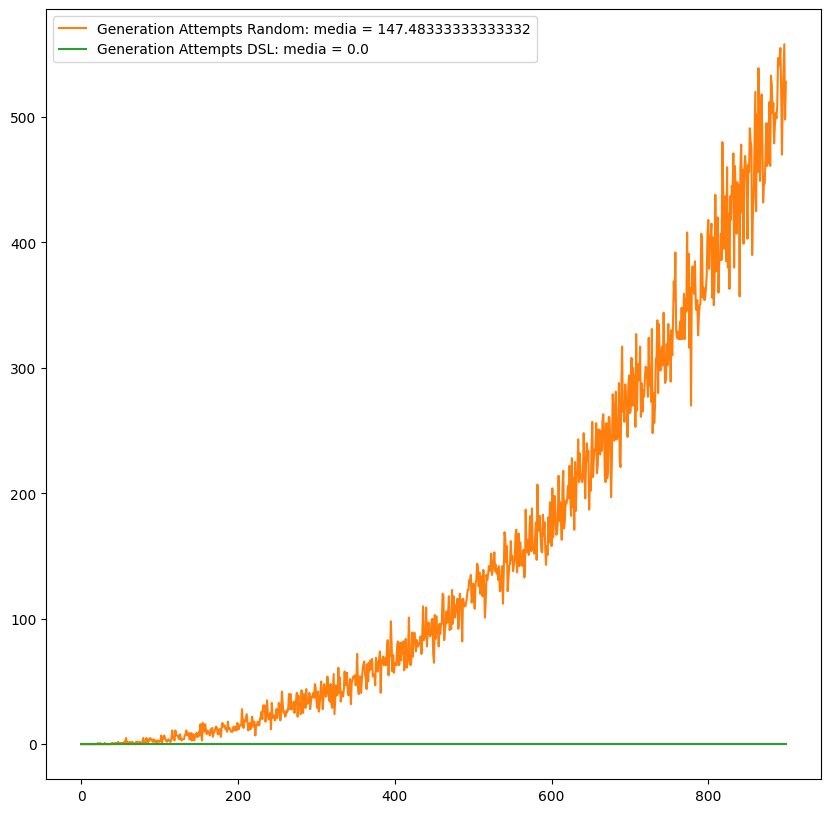

In [6]:
df = pd.read_csv('csv/set_randint_data.csv')
X = df['iter_num']
Y1 = df["attempts"]

df = pd.read_csv('csv/set_dsl_data.csv')
Y2 = df["attempts"]

plt = tools.Plotting()
plt.append(X, Y1, f'Generation Attempts Random: media = {sum(Y1)/len(Y1)}')
plt.append(X, Y2, f'Generation Attempts DSL: media = {sum(Y2)/len(Y2)}')

plt.plot()

# Temporal and Attempting Analyze for Event Find 

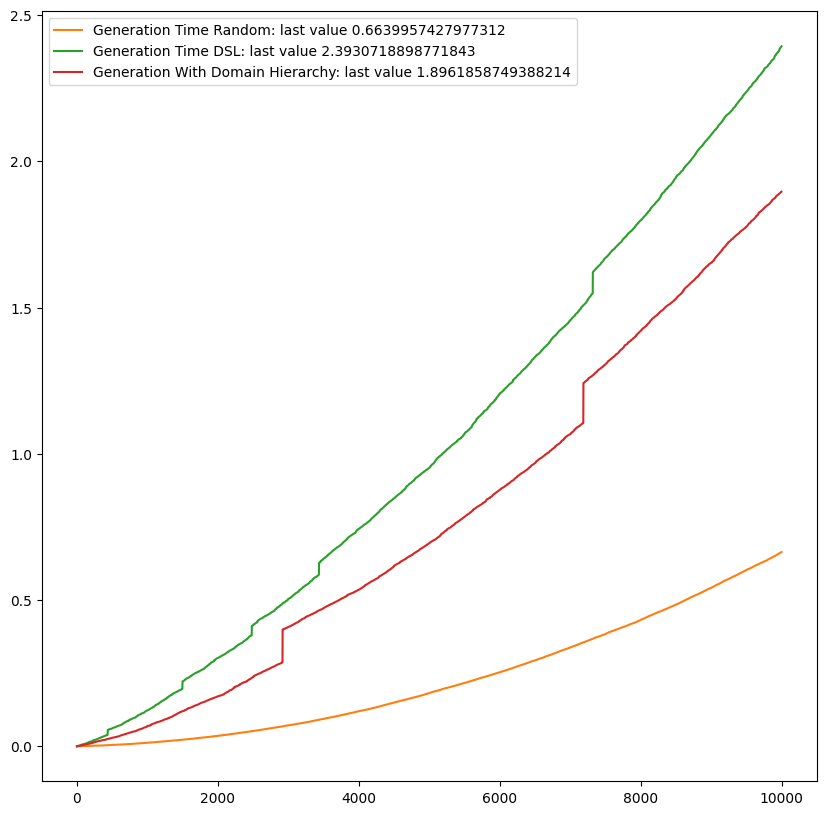

In [7]:
plt = tools.Plotting()

df = pd.read_csv('csv/even_randint_data.csv')
X = df['iter_num']
Y1 = tools.computing_time(df["time"])
plt.append(X, Y1, f'Generation Time Random: last value {Y1[-1]}')

df = pd.read_csv('csv/even_dsl_data.csv')
Y2 = tools.computing_time(df["time"])
plt.append(X, Y2, f'Generation Time DSL: last value {Y2[-1]}')

df = pd.read_csv('csv/even_trap_data.csv')
Y2 = tools.computing_time(df["time"])
plt.append(X, Y2, f'Generation With Domain Hierarchy: last value {Y2[-1]}')

plt.plot()

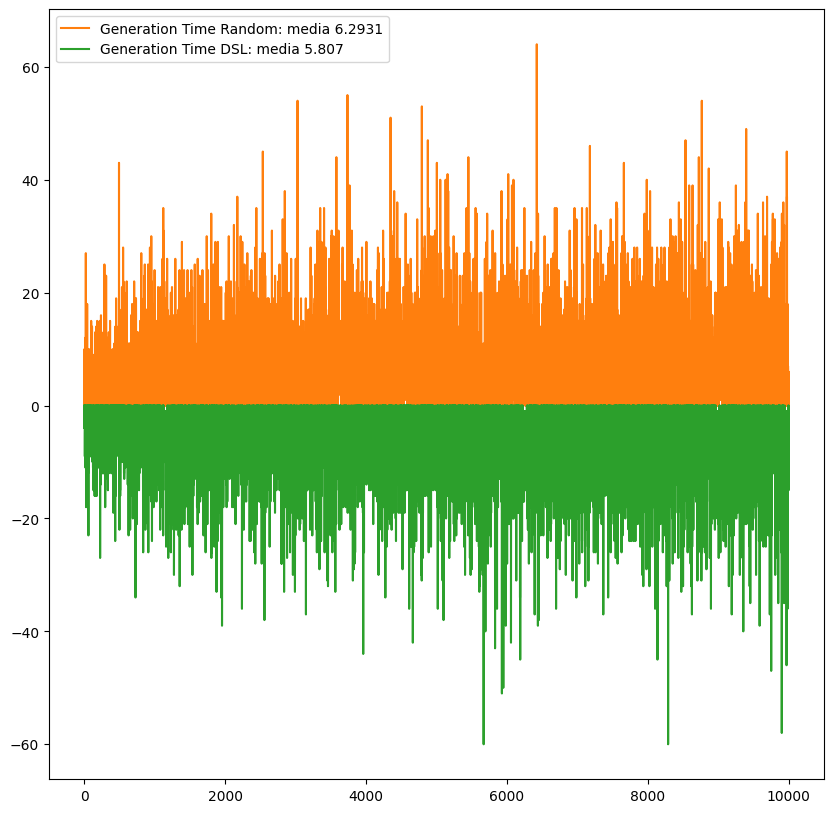

In [8]:
plt = tools.Plotting()

df = pd.read_csv('csv/even_randint_data.csv')
X = df['iter_num']
Y1 = df["attempts"]
plt.append(X, Y1, f'Generation Time Random: media {sum(Y1)/len(Y1)}')

df = pd.read_csv('csv/even_dsl_data.csv')
Y2 = df["attempts"]
plt.append(X, Y2 * -1, f'Generation Time DSL: media {sum(Y2)/len(Y2)}')

plt.plot()

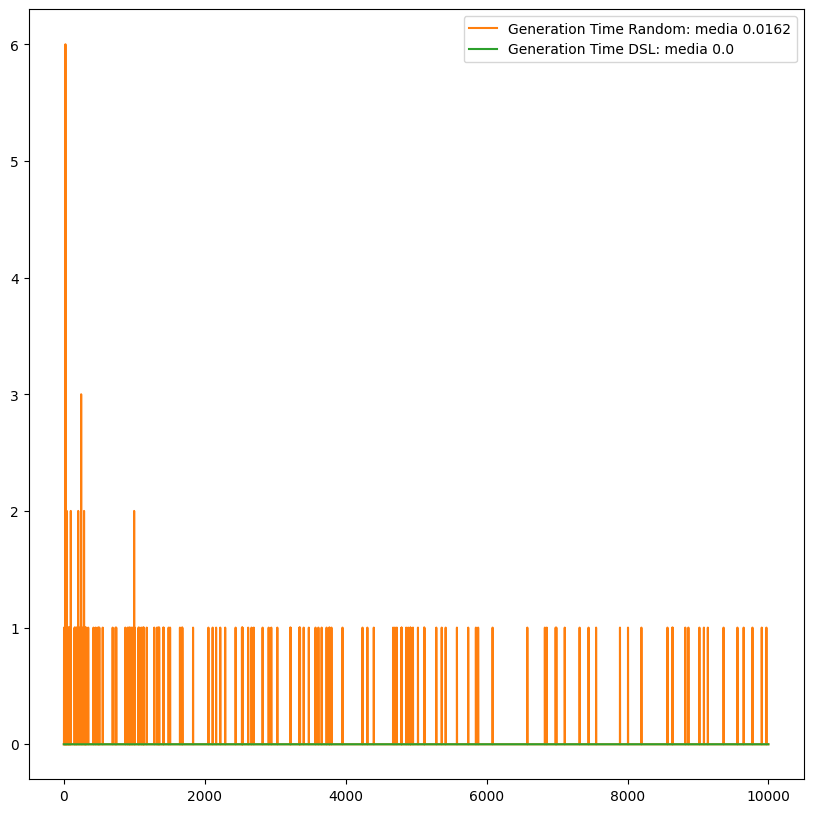

In [9]:
plt = tools.Plotting()

df = pd.read_csv('csv/even_randint_data.csv')
X = df['iter_num']
Y1 = df["value_repetition"]
plt.append(X, Y1, f'Generation Time Random: media {sum(Y1)/len(Y1)}')

df = pd.read_csv('csv/even_dsl_data.csv')
Y2 = df["value_repetition"]
plt.append(X, Y2 * -1, f'Generation Time DSL: media {sum(Y2)/len(Y2)}')

plt.plot()

In [3]:
def recursivity(dims, index = []):
    if len(index) == len(dims):
        return index
    
    result = []
    for i in range(dims[len(index)]):
        result.append(recursivity(dims, index + [i]))
    
    return result

# recursivity((10,10))

In [4]:
def bfs(dims):
    Q = [[i] for i in range(dims[0])]

    for i in range(1, len(dims)):
        temp = []
        for j in range(dims[i]):
            for n in Q:
                temp.append(n + [j])
        Q = temp
    
    return Q

# bfs((10, 10))     

In [5]:
def indexes(dims, i = 0):
    if len(dims) == i:
        yield []
    else: 
        for j in range(dims[i]):
            for rest in indexes(dims, i + 1):
                yield [j] + rest        

In [6]:
import numpy

def r_iter(index):
    array = numpy.zeros(index)
    return list(_r_iter(array))

def _r_iter(array):
    try:
        for i, row in enumerate(array):
            for item in _r_iter(row):
                yield [i] + item
    except TypeError:
        yield []

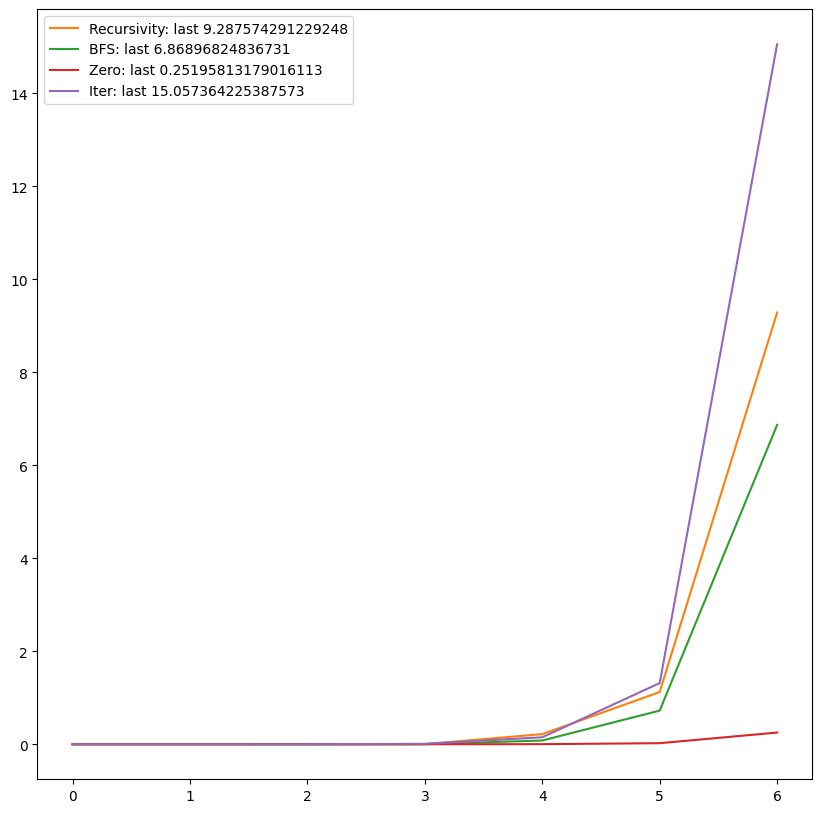

In [9]:
from time import time

plt = tools.Plotting()

X, R, B, Z, I  = [], [], [], [], []

index = []
for i in range(7):
    X.append(i)
    index.append(10)
    
    start = time()
    recursivity(index)
    R.append(time() - start)

    start = time()
    bfs(index)
    B.append(time() - start)

    l = list(indexes(index))
    start = time()
    for _ in l:
        pass
    Z.append(time() - start)

    start = time()
    list(indexes(index))
    I.append(time() - start)

R = tools.computing_time(R)
B = tools.computing_time(B)
Z = tools.computing_time(Z)
I = tools.computing_time(I)

plt.append(X, R, f'Recursivity: last {R[-1]}')
plt.append(X, B, f'BFS: last {B[-1]}')
plt.append(X, Z, f'Zero: last {Z[-1]}')
plt.append(X, I, f'Iter: last {I[-1]}')

plt.plot()